# Group 2 - Mushrooms

### Felix Crowther, Ian Kegler, Yeonjin Kim, Tom Shakespeare

Data: https://archive.ics.uci.edu/ml/datasets/Mushroom

Authors' initials appear as comments above code.

## 1. Exploratory

Importing modules for exploratory analysis, and dataset. Dataset checked to remove rows with missing attribute:

In [17]:
#TS
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import seaborn as sns

mushroom = pd.read_csv('mushrooms-final.csv')
mushroom = mushroom.dropna()

print 'Total entries: %0.0f' %(len(mushroom['Edible']))
e_list = list(mushroom['Edible'])
print 'Total Edible: %0.0f' %(e_list.count('e'))
print 'Total Poisonous: %0.0f' %(e_list.count('p'))
ed_percent = 100 * e_list.count('e') / len(mushroom['Edible'])
print 'Percentage which are edible: %0.0f' %(ed_percent)

Total entries: 8124
Total Edible: 4208
Total Poisonous: 3916
Percentage which are edible: 51


Graphs showing count of edible and poisonous mushrooms for most relevant attricutes (Odour, Spore colour and habitat.):
These determined through observation.

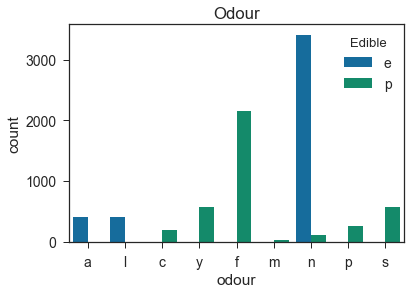

odour: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s


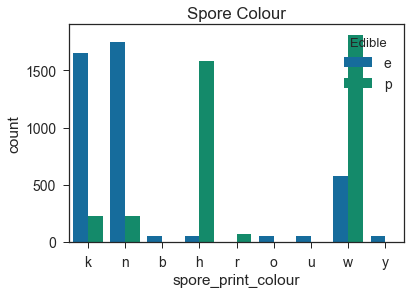

Spore colour: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y


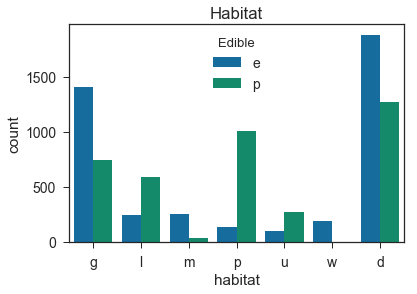

habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d


In [18]:
#YK
sns.countplot(x='odour', hue='Edible', data=mushroom, order = ['a','l','c','y','f','m','n','p','s'], hue_order = ['e', 'p'])
plt.title('Odour')
plt.show()
print 'odour: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s'
#TS
sns.countplot(x='spore_print_colour', hue='Edible', data=mushroom, order = ['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'], hue_order = ['e', 'p'])
plt.title('Spore Colour')
plt.show()
print 'Spore colour: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y'

#TS
sns.countplot(x='habitat', hue='Edible', data=mushroom, order = ['g', 'l', 'm', 'p', 'u', 'w', 'd'], hue_order = ['e', 'p'])
plt.title('Habitat')
plt.show()
print 'habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d'

Graphs for least relevant attributes (Ring number, stalk shape and veil colour):

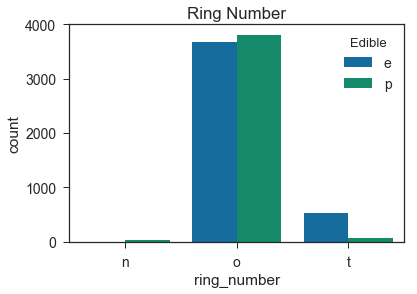

ring-number: none=n,one=o,two=t


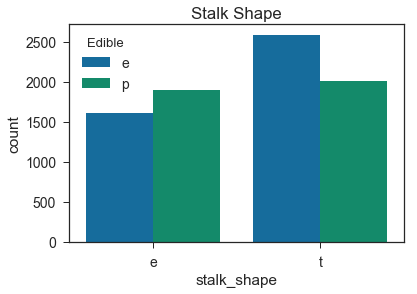

stalk-shape: enlarging=e,tapering=t


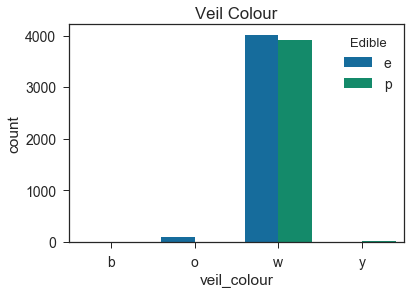

veil colour: brown = n, orange = o, white = w, yellow = y


In [19]:

#TS
sns.countplot(x='ring_number', hue='Edible', data=mushroom, order = ['n', 'o', 't'], hue_order = ['e', 'p'])
plt.title('Ring Number')
plt.show()
print 'ring-number: none=n,one=o,two=t'

#FC
sns.countplot(x='stalk_shape', hue='Edible', data=mushroom, order = ['e', 't'], hue_order = ['e', 'p'])
plt.title('Stalk Shape')
plt.show()
print 'stalk-shape: enlarging=e,tapering=t'

#IK
sns.countplot(x='veil_colour', hue='Edible', data=mushroom, order = ['b', 'o', 'w', 'y'], hue_order = ['e', 'p'])
plt.title('Veil Colour')
plt.show()
print 'veil colour: brown = n, orange = o, white = w, yellow = y'

## 2. Explanatory
Generalised Linear Model developed through trial, error and the conclusions drawn from above. Model based on 0.7 size training set, and tested afterwards.

In [20]:
#FC

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
sns.set(style = 'ticks', palette='colorblind', font_scale = 1.4)
mushrooms_full= pd.read_csv('mushrooms-final.csv') 
mushrooms_full['Edible'].replace(('e', 'p'), (0, 1), inplace=True)
train, test = train_test_split(mushrooms_full, test_size = 0.3, random_state=42)
 
dan = smf.glm(formula = 'Edible~C(odour)+C(spore_print_colour)+C(habitat)', data = train, family = sm.families.Binomial()).fit()
print dan.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Edible   No. Observations:                 5686
Model:                            GLM   Df Residuals:                     5663
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Jun 2017   Deviance:                       84.305
Time:                        00:46:17   Pearson chi2:                     74.0
No. Iterations:                    30                                         
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                    -26.7169   7.85e+05   -3.4e-05      1.000     -1.54e+06  1.54e+06
C(od

#### Confusion Matrix and GLM model analysis

Confusion matrix found the model already has very good accuracy recall. Accuracy, precision and recall all > 0.99, but recall is most important as do not want to falsely predict a poisonous mushroom is edible.

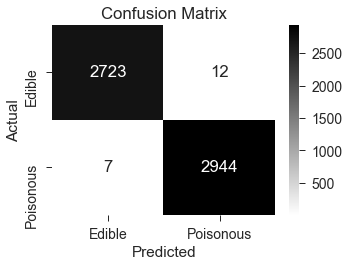


Metrics
Accuracy: 0.997
Precision: 0.997
Recall: 0.996
Accuracy on test: 0.997949
Precision on test: 0.999151
Recall on test: 0.996613


In [21]:
#FC

conf_mat = confusion_matrix(train['Edible'], dan.predict()>0.5, labels = [1, 0])
df_cm = pd.DataFrame(conf_mat, index = ['Edible', 'Poisonous'], columns = ['Edible', 'Poisonous'])
plt.figure(figsize = (5,3.5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap = 'binary')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print '\nMetrics'
print 'Accuracy: %.3f' %accuracy_score(train['Edible'], dan.predict()>0.5)
print 'Precision: %.3f' %precision_score(train['Edible'], dan.predict()>0.5)
print 'Recall: %.3f' %recall_score(train['Edible'], dan.predict()>0.5)

print 'Accuracy on test: %f' %accuracy_score(test['Edible'], dan.predict(test)>0.5)
print 'Precision on test: %f' %precision_score(test['Edible'], dan.predict(test)>0.5)
print 'Recall on test: %f' %recall_score(test['Edible'], dan.predict(test)>0.5)

### Reformatting data for predictive analysis
Created columns for each category within each attribute in order that the dataset was only populated by ones and zeros. Enables use with Scikit learn

In [22]:
#FC

def prepare_for_sk(column, mush, replace_str):
    dummies = []
    cols = [column]
    for col in cols:
         dummies.append(pd.get_dummies(mushrooms_full[col]))
    mushroom_dummies = pd.concat(dummies, axis=1)
    mushroom_dummies.rename(columns=replace_str, inplace=True)
    mush1 = pd.concat((mush,mushroom_dummies),axis=1)
    del mush1[column]
    return mush1

dummies = []
cols = ['cap_shape']
for col in cols:
     dummies.append(pd.get_dummies(mushrooms_full[col]))
mushroom_dummies = pd.concat(dummies, axis=1)
mushroom_dummies.rename(columns={'b': 'cap_shape_bell', 'c': 'cap_shape_conical', 'x': 'cap_shape_convex', 'f': 'cap_shape_flat', 'k': 'cap_shape_knobbed', 's': 'cap_shape_sunken'}, inplace=True)
global mushrooms_sk 
mushrooms_sk = pd.concat((mushrooms_full,mushroom_dummies),axis=1)
del mushrooms_sk['cap_shape']


first = prepare_for_sk('cap_surface', mushrooms_sk, replace_str={'f': 'cap_surface_fibrous', 'g': 'cap_surface_grooves', 'y': 'cap_surface_scaly', 's': 'cap_surface_smooth'})
second = prepare_for_sk('bruises?', mush=first, replace_str={'t': 'bruises_yes', 'f': 'bruises_no'})
third = prepare_for_sk('gill_colour', mush=second, replace_str={'k': 'colour_black', 'n': 'colour_brown', 'b': 'colour_buff', 'h': 'colour_chocolate', 'g': 'colour_gray', 'r': 'colour_green', 'o': 'colour_orange', 'p': 'colour_pink', 'u': 'colour_purple', 'e': 'colour_red', 'w': 'colour_white', 'y': 'colour_yellow'})
fourth = prepare_for_sk('gill_spacing', mush=third, replace_str={'c': 'gill_spacing_close', 'w': 'gill_spacing_crowded', 'd': 'gill_spacing_distant'})
fifth = prepare_for_sk('gill_size', mush=fourth, replace_str={'b': 'gill_size_broad', 'n': 'gill_size_narrow'})
sixth = prepare_for_sk('stalk_shape', mush=fifth, replace_str={'e': 'stalk_shape_enlarging', 't': 'stalk_shape_tapering'})
seventh = prepare_for_sk('stalk_root', mush=sixth, replace_str={'b': 'stalk_root_bulbous', 'c': 'stalk_root_club', 'u': 'stalk_root_cup', 'e': 'stalk_root_equal', 'z': 'stalk_root_rhizomorphs', 'r': 'stalk_root_rooted'})
eighth = prepare_for_sk('stalk_surface_above_ring', mush=seventh, replace_str={'f': 'above_ring_fibrous', 'k': 'above_ring_silky', 'y': 'above_ring_scaly', 's': 'above_ring_smooth'})
ninth = prepare_for_sk('cap_colour', mush=eighth, replace_str={'n': 'cap_color_brown', 'b': 'cap_color_buff', 'c': 'cap_color_cinnamon', 'g': 'cap_color_gray', 'r': 'cap_color_green', 'p': 'cap_color_pink', 'u': 'cap_color_purple', 'e': 'cap_color_red', 'w': 'cap_color_white', 'y': 'cap_color_yellow'})
tenth = prepare_for_sk('odour', mush=ninth, replace_str={'a': 'odor_almond', 'l': 'odor_anise', 'c': 'odor_creosote', 'y': 'odor_fishy', 'f': 'odor_foul', 'm': 'odor_musty', 'n': 'odor_none', 'p': 'odor_pungent', 's': 'odor_spicy'})
eleventh = prepare_for_sk('gill_attachment', mush=tenth, replace_str={'a': 'gill_attachment_attached', 'd': 'gill_attachment_descending', 'f': 'gill_attachment_free', 'n': 'gill_attachment_notched'})
twelfth = prepare_for_sk('stalk_surface_below_ring', mush=eleventh, replace_str={'f': 'stalk_surface_below_ring_fibrous', 'k': 'stalk_surface_below_ring_silky', 'y': 'stalk_surface_below_ring_scaly', 's': 'stalk_surface_below_ring_smooth'})
thirteenth = prepare_for_sk('stalk_colour_above_ring', mush=twelfth, replace_str={'n': 'stalk_colour_above_ring_brown', 'b': 'stalk_colour_above_ring_buff', 'c': 'stalk_colour_above_ring_cinnamon', 'g': 'stalk_colour_above_ring_grey', 'o':'stalk_colour_above_ring_orange', 'p':'stalk_colour_above_ring_pink', 'e':'stalk_colour_above_ring_red', 'w':'stalk_colour_above_ring_white', 'y':'stalk_colour_above_ring_yellow'})
fourteenth = prepare_for_sk('stalk_colour_below_ring', mush=thirteenth, replace_str={'n': 'stalk_colour_below_ring_brown', 'b': 'stalk_colour_below_ring_buff', 'c': 'stalk_colour_below_ring_cinnamon', 'g': 'stalk_colour_below_ring_grey', 'o':'stalk_colour_below_ring_orange', 'p':'stalk_colour_below_ring_pink', 'e':'stalk_colour_below_ring_red', 'w':'stalk_colour_below_ring_white', 'y':'stalk_colour_below_ring_yellow'})
fifteenth = prepare_for_sk('veil_type', mush=fourteenth, replace_str={'p': 'veil_type_partial', 'u': 'veil_type_universal'})
sixteenth = prepare_for_sk('veil_colour', mush=fifteenth, replace_str={'n': 'veil_colour_brown', 'o': 'veil_colour_orange', 'w': 'veil_colour_white', 'y': 'veil_colour_yellow'})
seventeenth = prepare_for_sk('ring_number', mush=sixteenth, replace_str={'n': 'ring-number_none', 'o': 'ring-number_one', 't': 'ring-number_two'})
eighteenth = prepare_for_sk('ring_type', mush=seventeenth, replace_str={'c': 'ring-type_cobwebby', 'e': 'ring-type_evanescent', 'f': 'ring-type_flaring', 'l': 'ring-type_large', 'n': 'ring-type_none', 'p': 'ring-type_pendant', 's': 'ring-type_sheathing', 'z': 'ring-type_zone'})
nineteenth = prepare_for_sk('spore_print_colour', mush=eighteenth, replace_str={'k': 'spore_print_color_black', 'n': 'spore_print_color_brown', 'b': 'spore_print_color_buff', 'h': 'spore_print_color_chocolate', 'r': 'spore_print_color_green', 'o': 'spore_print_color_orange', 'u': 'spore_print_color_purple', 'w': 'spore_print_color_white', 'y': 'spore_print_color_yellow'})
twentieth = prepare_for_sk('population', mush=nineteenth, replace_str={'a': 'population_abundant', 'c': 'population_clustered', 'n': 'population_numerous', 's': 'population_scattered', 'v': 'population_several', 'y': 'population_solitary'})
mushrooms_selecting = prepare_for_sk('habitat', mush=twentieth, replace_str={'g': 'habitat_grasses', 'l': 'habitat_leaves', 'm': 'habitat_meadows', 'p': 'habitat_paths', 'u': 'habitat_urban', 'w': 'habitat_waste', 'd': 'habitat_woods'})

The dataset is then split into segments for training and testing and Segments formatted as arrays

In [23]:
#IK


train, test = train_test_split(mushrooms_selecting, test_size = 0.8, random_state=42)

y_train = np.array(train['Edible'])
y_test = np.array(test['Edible'])
del train['Edible']; del test['Edible']
x_train = np.array(train)
x_test = np.array(test)

## 3. Predictive

Each member wrote code for different models:

### Logistic Regression

Model constructed using lasso to determine the most important variables, and k-fold cross validation for refinement.

In [24]:
#FC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

selected_vars = list(train.columns)

model = LogisticRegression(penalty='l1', C=0.5, fit_intercept = True)

scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
print 'Mean accuracy from the cross-validation: %f' %np.mean(scores)

model.fit(x_train, y_train)
print 'Accuracy (train): %f' %accuracy_score(y_train, model.predict(x_train)>0.5)
print '\nAccuracy on the test: %f' %accuracy_score(y_test, model.predict(x_test))
print 'Precision on test: %f' %precision_score(y_test, model.predict(x_test))
print 'Recall on test: %f' %recall_score(y_test, model.predict(x_test))

felix = zip(selected_vars, list(model.coef_[0]))
print '\n'
def print_important(data):
    important_vals=[]
    for i in data:
        if i[1] != 0:
            important_vals.append(i)
    for x in range(len(important_vals)):
        if important_vals[x][0] == '?':
            pass
        else:
            print important_vals[x][0], important_vals[x][1]
#     final_vars = []
#     for i in range(len(important_vals)):
#         final_vars.append(important_vals[i][0])
#     if '?' in final_vars: final_vars.remove('?')
#     return final_vars
final_model_vars = print_important(felix)    


Mean accuracy from the cross-validation: 0.998152
Accuracy (train): 0.998153

Accuracy on the test: 0.998000
Precision on test: 1.000000
Recall on test: 0.995857


cap_surface_fibrous -0.310492481395
gill_spacing_close 0.814881340181
gill_size_broad -0.283850089291
gill_size_narrow 2.89701123361
stalk_shape_enlarging 0.0676985341966
stalk_root_bulbous 0.19191474588
above_ring_silky 1.89598463202
odor_almond -4.7815795011
odor_foul 3.29060463787
odor_anise -4.75989960293
odor_none -5.78155969704
spore_print_color_brown -0.167998869465
spore_print_color_green 6.69784617131
spore_print_color_white 1.00178891902


### Decision Tree
Used sklearn to construct a decision tree. The maximum depth was increased to seven as that was the smallest number where the accuracy peaked.

In [25]:
#TS
from sklearn import tree, svm, ensemble

mushtree = tree.DecisionTreeClassifier(max_depth = 7) # Our classification tree
mushtree = mushtree.fit(x_train, y_train)

print '\nFor the training set:'
print 'Accuracy: %0.4f'%(accuracy_score(y_train, mushtree.predict(x_train)))
print 'Precision: %0.4f'%(precision_score(y_train, mushtree.predict(x_train)))
print 'Recall: %0.4f'%(recall_score(y_train, mushtree.predict(x_train)))


print '\nFor the test set:'
print 'Accuracy: %0.4f'%(accuracy_score(y_test, mushtree.predict(x_test)))
print 'Precision: %0.4f'%(precision_score(y_test, mushtree.predict(x_test)))
print 'Recall: %0.4f'%(recall_score(y_test, mushtree.predict(x_test)))


For the training set:
Accuracy: 0.9988
Precision: 1.0000
Recall: 0.9974

For the test set:
Accuracy: 0.9994
Precision: 1.0000
Recall: 0.9987


### Random Forest

Random forest builds 40 decision trees randomly from the training set, and outputs the class that is the mode of the classes or mean prediction of the individual trees, which controls overfitting.

In [26]:
#YK

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree, svm, ensemble


clf1 = ensemble.RandomForestClassifier(n_estimators=40)
scores = cross_val_score(clf1, x_train, y_train, cv=10, scoring='accuracy')

clf1.fit(x_train,y_train)

print 'Accuracy on the train set: %f' %accuracy_score(y_train, clf1.predict(x_train))
print 'Accuracy on the test set: %f' %accuracy_score(y_test, clf1.predict(x_test))
print 'recall on the test set: %f' %recall_score(y_test, clf1.predict(x_test))
print 'precision on the test set: %f' %precision_score(y_test, clf1.predict(x_test))

Accuracy on the train set: 1.000000
Accuracy on the test set: 0.998769
recall on the test set: 0.997451
precision on the test set: 1.000000


### Support Vector Machine (SVM)

SVM object created using a linear kernel and 100 as the penalty parameter for the error term.
SVM object applied, with the training datasets, to 5 fold cross validation process.
Mean accuracy of all five instances displayed.
Accuracy of model on test data calculated an displayed.

In [27]:
#IK
from sklearn import svm

svm_lin = svm.SVC(kernel='linear', C = 100)

scores = cross_val_score(svm_lin, x_train, y_train, cv=5, scoring='accuracy')

print 'Mean accuracy from the cross-validation: %f \n and the full vector: %s\n' %(np.mean(scores), scores)

svm_lin.fit(x_train,y_train)
                                                                                        
print '\nAccuracy on the test set: %f' %accuracy_score(y_test, svm_lin.predict(x_test))
print '\nPrecision on test: %f' %precision_score(y_test, svm_lin.predict(x_test))
print '\nRecall on test: %f' %recall_score(y_test, svm_lin.predict(x_test))

Mean accuracy from the cross-validation: 0.998765 
 and the full vector: [ 1.          1.          1.          0.99382716  1.        ]


Accuracy on the test set: 0.998769

Precision on test: 1.000000

Recall on test: 0.997451


Using non-linear kernel:

SVM object created using a radius basis function kernel, 100 as the penalty parameter for the error term and 0.0001 
for the gamma paratmeter (which affects the influence of a single training example. low = 'far, high = 'close')
SVM object applied, with the training datasets, to 5 fold cross validation process.

Mean accuracy of all five instances displayed.
Accuracy of model on test data calculated and displayed.

In [28]:
#IK
svm_nonlin = svm.SVC(kernel='rbf', C=1000, gamma=0.0001)

scores = cross_val_score(svm_nonlin, x_train, y_train, cv=5, scoring='accuracy')

print 'Mean accuracy from the cross-validation: %f \n and the full vector: %s\n' %(np.mean(scores), scores)

svm_nonlin.fit(x_train,y_train)
                                                                                        
print '\nAccuracy on the test set: %f' %accuracy_score(y_test, svm_nonlin.predict(x_test))
print '\nPrecision on test: %f' %precision_score(y_test, svm_nonlin.predict(x_test))
print '\nRecall on test: %f' %recall_score(y_test, svm_nonlin.predict(x_test))

Mean accuracy from the cross-validation: 0.998150 
 and the full vector: [ 1.          0.99692308  1.          0.99382716  1.        ]


Accuracy on the test set: 0.998615

Precision on test: 1.000000

Recall on test: 0.997132


Cross-validation comparing kernel and parameter:

Desired parameters for exhastive search specified, and clf assigned to estimator with highest accuracy.

Accuracy of model on test data calculated an displayed.

In [29]:
#IK
from sklearn.model_selection import GridSearchCV

parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

svm_cv = svm.SVC()

clf2 = GridSearchCV(svm_cv, parameters, cv=5, scoring='accuracy')

clf2.fit(x_train,y_train)

print clf2.best_params_

print '\nAccuracy on the test set: %f' %accuracy_score(y_test, clf2.predict(x_test))
print '\nPrecision on test: %f' %precision_score(y_test, clf2.predict(x_test))
print '\nRecall on test: %f' %recall_score(y_test, clf2.predict(x_test))

{'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}

Accuracy on the test set: 0.998769

Precision on test: 1.000000

Recall on test: 0.997451


### Comparing Models

Comparing models in a table as below allows us to compare the different models, and see which performs best.

In [30]:
#TS
models = ['Logistic Reg', 'Tree', 'Forest', 'SVM Lin', 'SVM non-lin', 'SVM CV']

headings = ['Accuracy', 'Precision', 'Recall']
data = np.array([[accuracy_score(y_test, model.predict(x_test)), precision_score(y_test, model.predict(x_test)), recall_score(y_test, model.predict(x_test))],
                 [accuracy_score(y_test, mushtree.predict(x_test)), precision_score(y_test, mushtree.predict(x_test)), recall_score(y_test, mushtree.predict(x_test))],
                 [accuracy_score(y_test, clf1.predict(x_test)), precision_score(y_test, clf1.predict(x_test)), recall_score(y_test, clf1.predict(x_test))],
                 [accuracy_score(y_test, svm_lin.predict(x_test)), precision_score(y_test, svm_lin.predict(x_test)), recall_score(y_test, svm_lin.predict(x_test))],
                 [accuracy_score(y_test, svm_nonlin.predict(x_test)), precision_score(y_test, svm_nonlin.predict(x_test)), recall_score(y_test, svm_nonlin.predict(x_test))],
                 [accuracy_score(y_test, clf2.predict(x_test)), precision_score(y_test, clf2.predict(x_test)), recall_score(y_test, clf2.predict(x_test))]])


row_format ="{:>20}" * (len(headings) + 1)
print row_format.format("", *headings)
for mod, row in zip(models, data):
    print row_format.format(mod, *row)

                                Accuracy           Precision              Recall
        Logistic Reg               0.998                 1.0      0.995857233907
                Tree      0.999384615385                 1.0      0.998725302741
              Forest      0.998769230769                 1.0      0.997450605481
             SVM Lin      0.998769230769                 1.0      0.997450605481
         SVM non-lin      0.998615384615                 1.0      0.997131931166
              SVM CV      0.998769230769                 1.0      0.997450605481


## Application

This cell creates a basic generalized linear model, using the findings from the non-linear predictors. Complex predictor models found the most distinctive features pertaining to edibility. Creating a basic GLM shows how from just a few pieces of information about a mushroom, you can easily gauge with confidence whether it will be poisonous.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Edible   No. Observations:                 3249
Model:                            GLM   Df Residuals:                     3222
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Jun 2017   Deviance:                       19.095
Time:                        00:46:29   Pearson chi2:                     15.0
No. Iterations:                    30                                         
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                    -35.1467   3.11e+06  -1.13e-05      1.000     -6.09e+06  6.09e+06
C(od

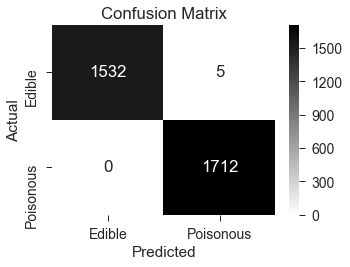


Metrics
Accuracy: 0.998461
Precision: 1.000000
Recall: 0.996747


Accuracy on test: 0.997744
Precision on test: 1.000000
Recall on test: 0.995376


In [31]:
#FC

training, test_data = train_test_split(mushrooms_full, test_size = 0.6, random_state=42)

ben = smf.glm(formula = 'Edible~C(odour)+C(spore_print_colour)+C(cap_colour)+C(gill_size)', data = training, family = sm.families.Binomial()).fit()
print ben.summary()
conf_mat = confusion_matrix(training['Edible'], ben.predict()>0.5, labels = [1, 0])
df_cm = pd.DataFrame(conf_mat, index = ['Edible', 'Poisonous'], columns = ['Edible', 'Poisonous'])
plt.figure(figsize = (5,3.5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap = 'binary')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print '\nMetrics'
print 'Accuracy: %f' %accuracy_score(training['Edible'], ben.predict()>0.5)
print 'Precision: %f' %precision_score(training['Edible'], ben.predict()>0.5)
print 'Recall: %f' %recall_score(training['Edible'], ben.predict()>0.5)
print '\n'
print 'Accuracy on test: %f' %accuracy_score(test_data['Edible'], ben.predict(test_data)>0.5)
print 'Precision on test: %f' %precision_score(test_data['Edible'], ben.predict(test_data)>0.5)
print 'Recall on test: %f' %recall_score(test_data['Edible'], ben.predict(test_data)>0.5)


### shown below, positive coefficient means more likely poisonous